# Introduction(Describe Dataset , Problem statement)
 


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # warnings
warnings.filterwarnings("ignore", category=RuntimeWarning ) #ignore runtime warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/medical-insurance-cost-dataset/insurance.csv


In [2]:
#load data
df=pd.read_csv('/kaggle/input/medical-insurance-cost-dataset/insurance.csv')


In [3]:
#getting info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df[['sex', 'smoker', 'region', 'age','children']].nunique()

sex          2
smoker       2
region       4
age         47
children     6
dtype: int64

In [8]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [9]:
numerical_cols

['age', 'bmi', 'children', 'charges']

# Exploratory Data Analysis
    1.Univariate Analysis
    2.Bivariate Analysis
    3.Multivariate Analysis

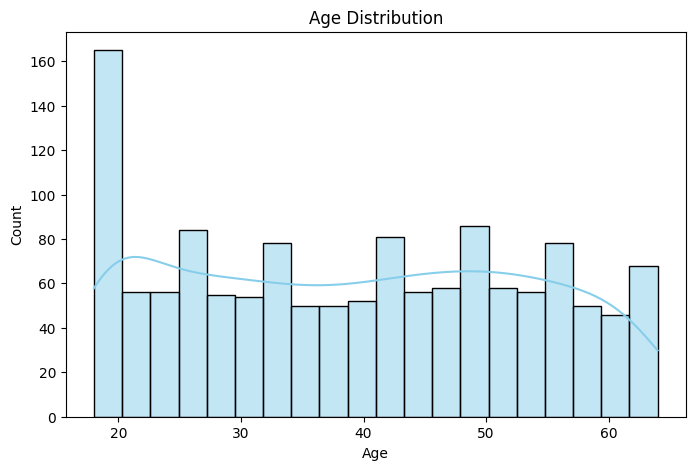

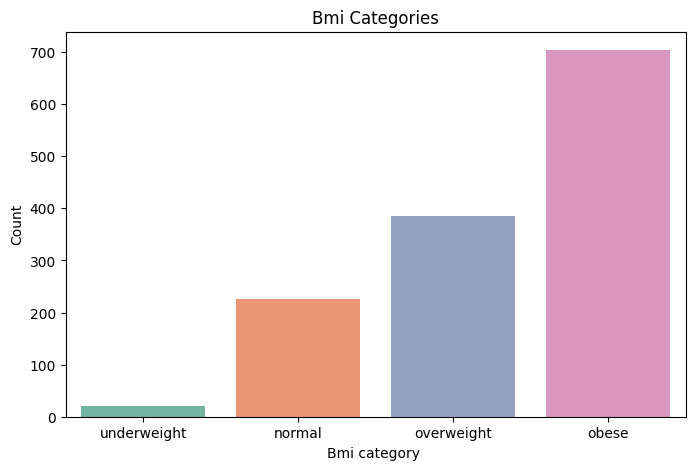

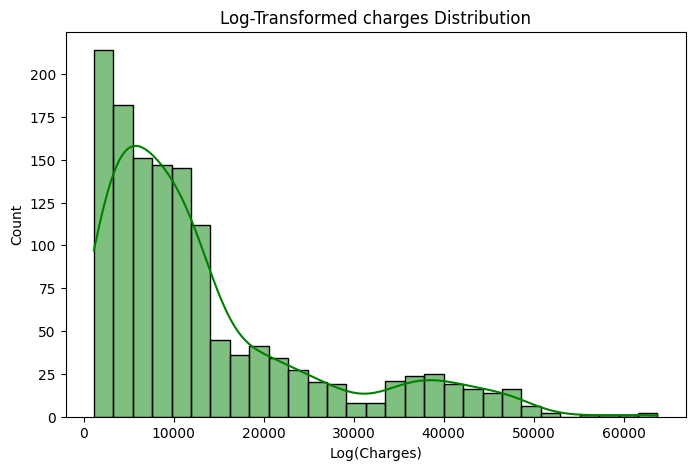

In [10]:
# 1. Univariate Analysis
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# BMI distribution with categories
df['bmi_category']=pd.cut(df['bmi'],bins=[0,18.5,25,30,100],labels=['underweight','normal','overweight','obese'])
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='bmi_category',palette = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title('Bmi Categories')
plt.xlabel('Bmi category ')
plt.ylabel('Count')
plt.show()
#charge distribution 
plt.figure(figsize=(8,5))
sns.histplot(df['charges'],kde=True,color='green')
plt.title('Log-Transformed charges Distribution')
plt.xlabel('Log(Charges)')
plt.show()

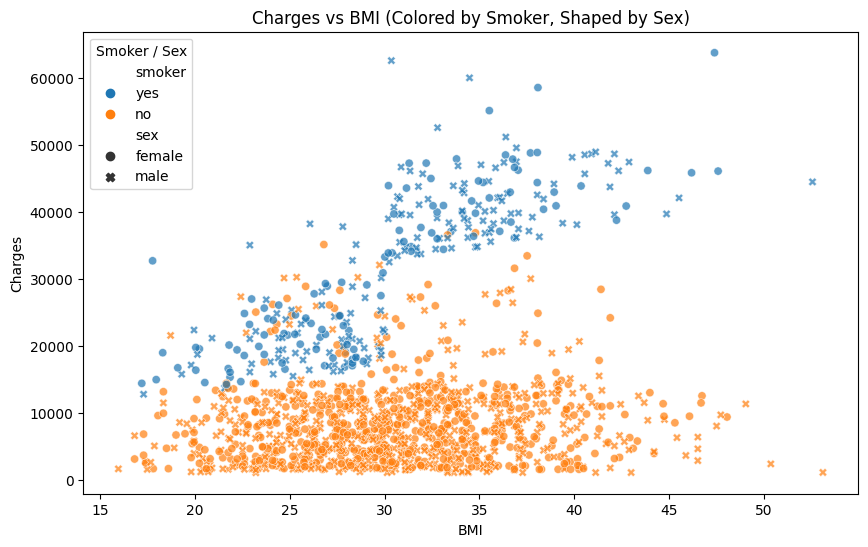

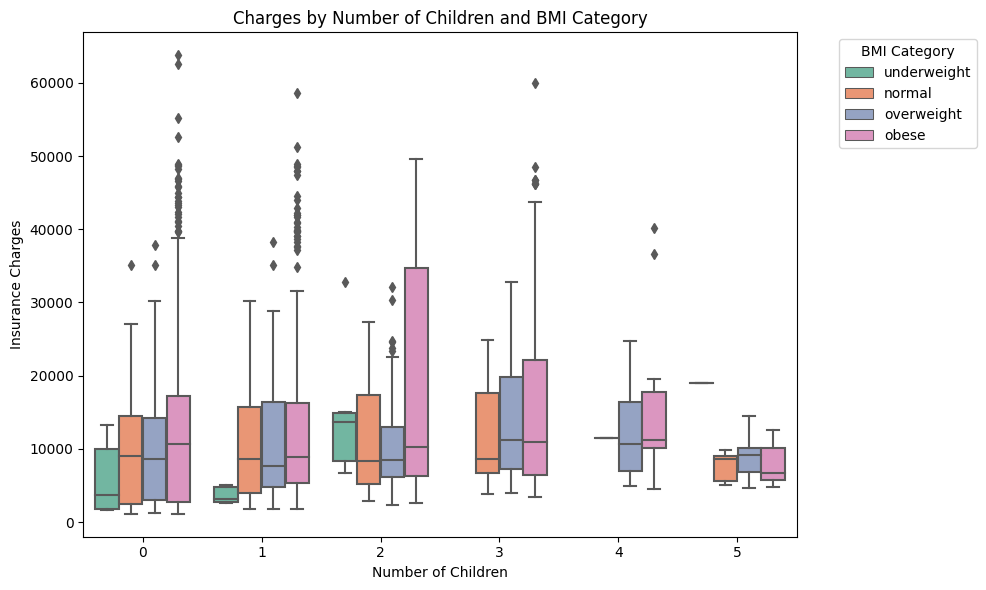

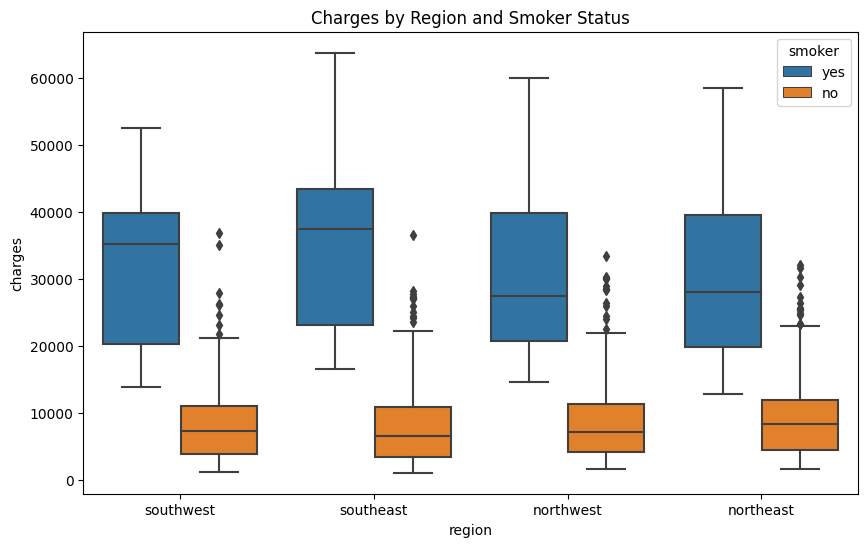

In [11]:
# 2.Bivariate Analysis
# What you can learn from this plot:
# Are smokers paying more in insurance charges at the same BMI?
# Do males and females have different trends?
# Are people with higher BMI generally paying more?
# Are clusters or outliers visible?
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi',
    y='charges',
    hue='smoker',
    style='sex',        # Shape by male/female
    data=df,
    alpha=0.7
)
plt.title('Charges vs BMI (Colored by Smoker, Shaped by Sex)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker / Sex')
plt.show()
# charges , children color coded boxes for diffrent bmi category
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='children',
    y='charges',
    hue='bmi_category',
    data=df,
    palette='Set2'
)

plt.title('Charges by Number of Children and BMI Category')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.legend(title='BMI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#Charges by Region and Smoker
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', hue='smoker', data=df)
plt.title('Charges by Region and Smoker Status')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


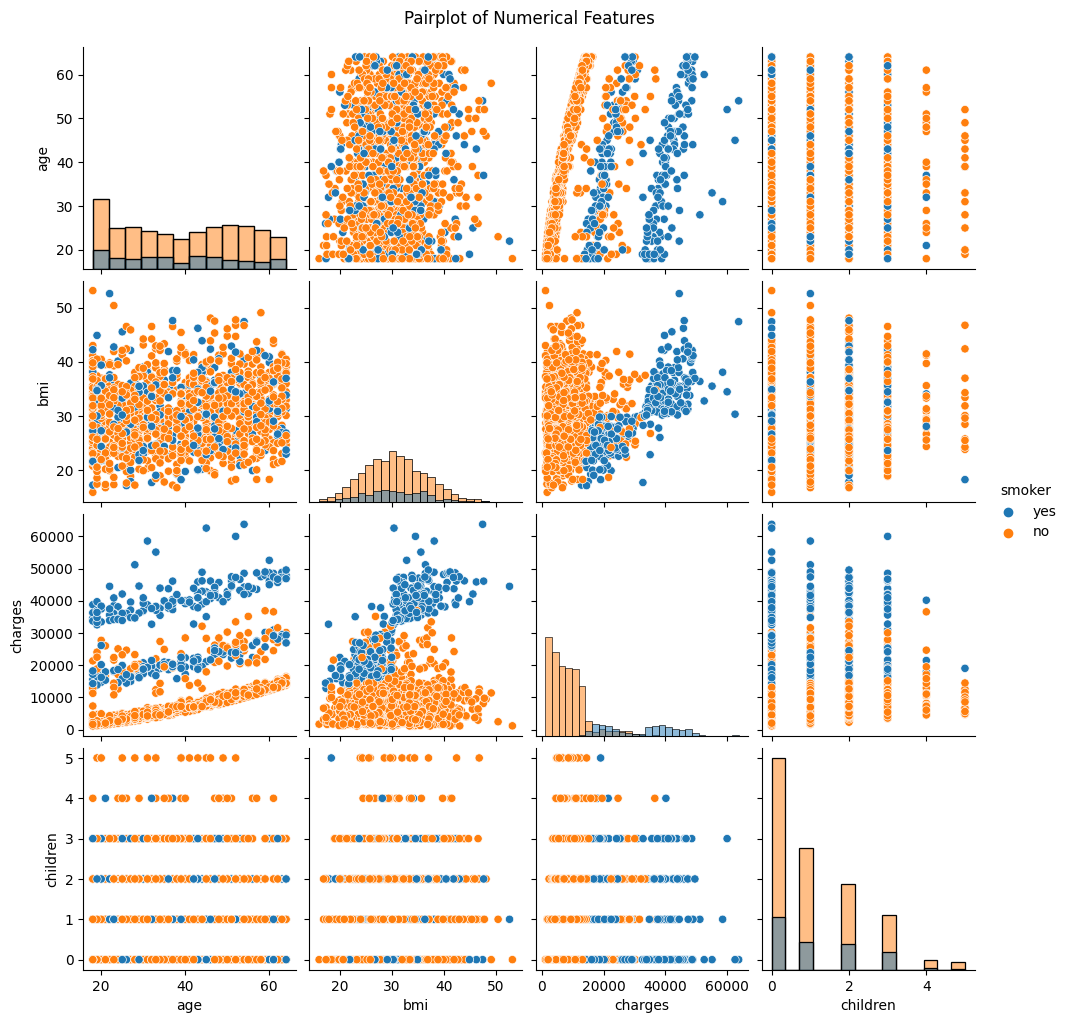

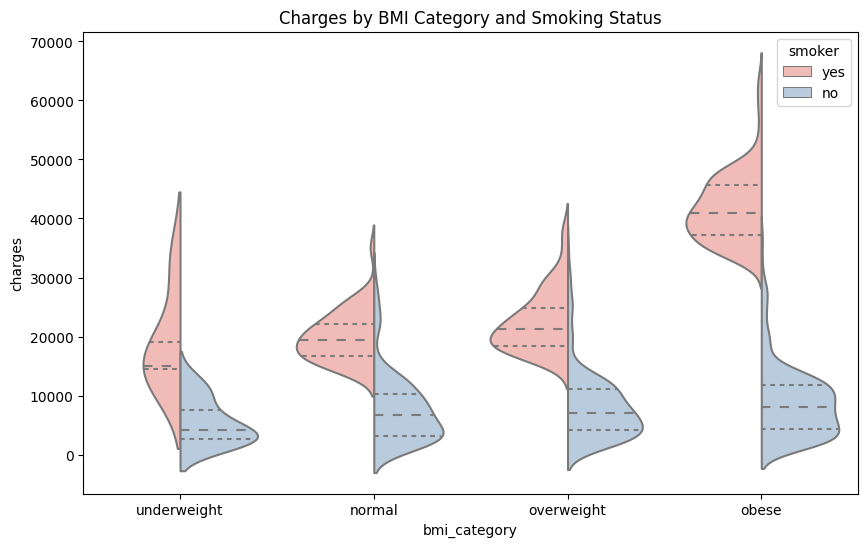

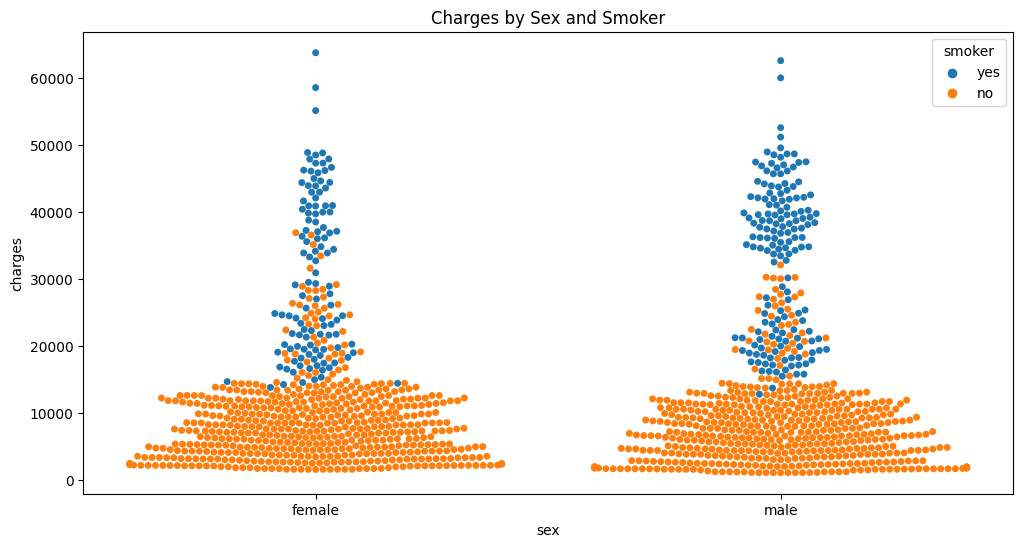

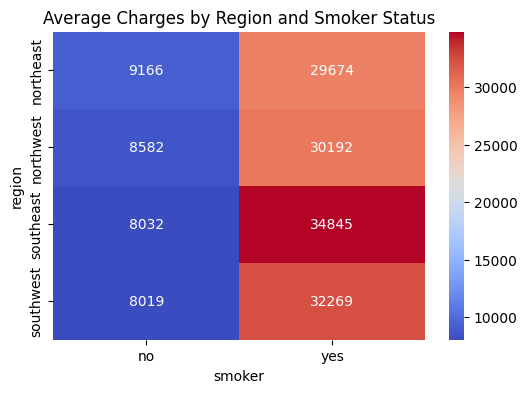

In [12]:
# 3.Multivariate Analysis
# a.Pairplot for Numeric Feature
sns.pairplot(df[['age', 'bmi', 'charges', 'children','smoker']], 
             hue='smoker',
             diag_kind='hist')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
# b.Violin Plot: Charges by BMI Category and Smoker
plt.figure(figsize=(10, 6))
sns.violinplot(x='bmi_category', y='charges', hue='smoker',
               data=df, split=True, palette='Pastel1',inner='quart')
plt.title('Charges by BMI Category and Smoking Status')
plt.show()
# c.Swarmplot: Age vs Charges by Sex and Smoker
plt.figure(figsize=(12, 6))
sns.swarmplot(x='sex', y='charges', hue='smoker', data=df)
plt.title('Charges by Sex and Smoker')
plt.show()

# d.Heatmap: Average Charges by Region & Smoker
pivot_table = df.pivot_table(values='charges', index='region', columns='smoker', aggfunc='mean')

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Average Charges by Region and Smoker Status')
plt.show()




# What Problem Are We Trying to Solve with These Visualizations?

The main goal is to understand the factors that influence medical insurance charges and to identify patterns or relationships between different variables in the dataset. 

**Explaining Variability in Insurance Costs:**
Visualizations help reveal how variables like age, BMI, smoking status, number of children, and region affect the medical insurance charges.

**Identifying Key Risk Factors:**
For example, we want to see if smoking or higher BMI leads to significantly higher insurance costs.

**Supporting Decision-Making:**
Insights can help insurance companies or policymakers design better pricing strategies or health interventions by targeting high-risk groups.

# What Did We Discover in the Data That Was Hidden Before?

**Smoking Status Drastically Affects Charges:**
The boxplots and scatterplots reveal that smokers consistently pay much higher insurance charges than non-smokers — a pattern not obvious just from raw tables.

**Non-Linear Relationship Between Age and Charges:**
The scatterplots show that charges generally increase with age but accelerate faster for older smokers, indicating an interaction effect between age and smoking.

**BMI Categories Reveal Risk Groups:**
By categorizing BMI, we see that obese individuals tend to have higher charges, especially if they also smoke — a nuance lost when looking only at raw BMI numbers.

**Region Has a Minor but Noticeable Effect:**
While region alone doesn’t strongly affect charges, combined with smoking status, some regions show higher average charges, which suggests regional risk differences or pricing strategies.

**Number of Children Has a Smaller Impact:**
Boxplots indicate that the number of children has little to no consistent effect on charges, which may surprise those expecting family size to influence costs more.

**Multivariate Patterns:**
The pairplot and violin plots help us uncover complex relationships where multiple factors interact (like BMI, smoking, and age together), which simple two-variable analyses wouldn’t catch.